## Neural Network Introduction #2

This exercise is adapted from https://www.springboard.com/blog/beginners-guide-neural-network-in-python-scikit-learn-0-18/

We'll use SciKit Learn's built in Breast Cancer Data Set which has several features of tumors with a labeled class indicating whether the tumor was Malignant or Benign. We will try to create a neural network model that can take in these features and attempt to predict malignant or benign labels for tumors it has not seen before. Let's go ahead and start by getting the data!

In [43]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [44]:
from sklearn.datasets import load_breast_cancer
cancer2 = load_breast_cancer()

Check out the dataframe - what are the first few rows of data?

In [45]:
dataframe = pd.DataFrame(data= np.c_[cancer2['data'], cancer2['target']], columns= np.append(cancer2['feature_names'],['target']))
# dataframe = pandas.read_csv("iris.csv", header=None)
dataframe

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0


In [46]:
# find out the attributes in the dataset
dataframe.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

In [47]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [48]:
# find out the total instances and number of features
len(dataframe.columns)

31

In [49]:
# use describe to find out more about the data
dataframe.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


<AxesSubplot:>

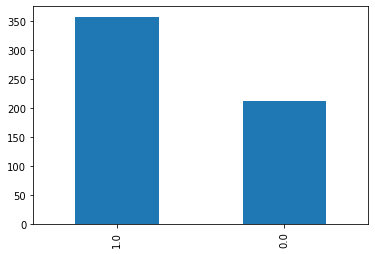

In [111]:
dataframe['target'].value_counts().plot(kind='bar')

**Q:** what can you say about this dataset?




- The dataset is not standardized, but there is no missing data

Now, set up the data (x) and labels (y)

In [50]:
dataset = dataframe.values
X = dataset[:,0:30].astype(float)
y = dataset[:,30]

#### Train Test Split
 
Let's split our data into training and testing sets, this is done easily with SciKit Learn's train_test_split function from model_selection:

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Data Preprocessing
 
The neural network may have difficulty converging before the maximum number of iterations allowed if the data is not normalized. Multi-layer Perceptron is sensitive to feature scaling, so it is highly recommended to scale your data. Note that you must apply the same scaling to the test set for meaningful results. There are a lot of different methods for normalization of data, we will use the built-in StandardScaler for standardization.

In [77]:
# Import the StandardScalar library
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# Fit only to the training data
sc.fit(X_train)

StandardScaler()

In [79]:
# Now apply the transformations to the data:
X_train  = sc.transform (X_train)
X_test  = sc.transform (X_test)

#### Training the model
 
Now it is time to train our model. SciKit Learn makes this incredibly easy, by using estimator objects. In this case we will import our estimator (the Multi-Layer Perceptron Classifier model) from the neural_network library of SciKit-Learn!

In [80]:
from sklearn.neural_network import MLPClassifier

Next we create an instance of the model, there are a lot of parameters you can choose to define and customize here, we will only define the hidden_layer_sizes. For this parameter you pass in a tuple consisting of the number of neurons you want at each layer, where the nth entry in the tuple represents the number of neurons in the nth layer of the MLP model. There are many ways to choose these numbers, but for simplicity we will choose 3 layers with the same number of neurons as there are features in our data set:

In [132]:
# create a Multilayerperceptron classifier and call it mlp
mlp = MLPClassifier(hidden_layer_sizes=(30, 10), random_state=42)

Now that the model has been made we can fit the training data to our model, remember that this data has already been processed and scaled:

In [133]:
clf  = mlp.fit(X_train, y_train)

C:\Users\tangkaiv\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


**Q:** What do you see in the output? What does it tell you?

#### Predictions and Evaluation
 
Now that we have a model it is time to use it to get predictions! We can do this simply with the predict() method off of our fitted model:

In [134]:
y_pred = clf.predict(X_test)

Now we can use SciKit-Learn's built in metrics such as a classification report and confusion matrix to evaluate how well our model performed:

In [135]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=cancer2.target_names))

              precision    recall  f1-score   support

   malignant       0.85      0.77      0.80        43
      benign       0.87      0.92      0.89        71

    accuracy                           0.86       114
   macro avg       0.86      0.84      0.85       114
weighted avg       0.86      0.86      0.86       114



**Q:** what conclusion can you make from the confusion matrix?

#### Weights and biases

The downside however to using a Multi-Layer Preceptron model is how difficult it is to interpret the model itself. The weights and biases won't be easily interpretable in relation to which features are important to the model itself.

To extract the MLP weights and biases after training your model, you use its public attributes coefs_ and intercepts_.

In [116]:
# Print the coefficient values and interpret it

mlp.coefs_

[array([[-7.31333724e-02,  2.40018704e-01,  1.72264174e-01,
          3.70190289e-02, -2.80454669e-01, -1.88188143e-01,
         -2.24953982e-01,  2.63893022e-01,  3.57714552e-02,
          1.81113610e-01, -3.51184293e-01,  2.34843972e-01,
          2.17752737e-01, -1.43566476e-01, -2.07420820e-01,
         -1.54072876e-01, -6.75972443e-02,  7.79203802e-02,
          3.09295222e-02, -9.52132829e-02,  1.41630629e-02,
         -1.51253208e-01, -1.03525059e-01, -1.28256454e-01,
         -6.46756837e-02,  1.59772157e-01, -1.63298492e-01,
         -1.47328985e-02,  1.45685274e-01, -2.34434698e-01],
        [ 7.25222787e-02, -2.52608044e-01, -2.47853717e-01,
          2.55473089e-01,  2.43477864e-01,  2.21389822e-01,
         -6.80046427e-02, -2.25551636e-01,  9.42526539e-02,
          1.58410466e-02, -2.81617552e-01, -5.74762135e-02,
         -2.83720846e-01,  2.94703577e-01, -1.60197137e-01,
          1.46393448e-01, -6.97768040e-02,  7.64015089e-02,
          9.65494971e-02, -1.65257225e-

In [117]:
# Print the intercepts values and interpret it

mlp.intercepts_

[array([-0.18817407, -0.26351976, -0.23130207,  0.0844532 ,  0.01250998,
         0.2294887 ,  0.1495821 , -0.11942081, -0.13091443, -0.11697677,
         0.10717191, -0.10049502,  0.06553115, -0.10016152,  0.04611509,
        -0.08715008, -0.18834246,  0.22125808,  0.09347008, -0.26921423,
         0.29354806, -0.07065894,  0.21947743,  0.23598366, -0.02210347,
        -0.29216288, -0.16144138,  0.05687556, -0.00125712, -0.20709607]),
 array([ 0.25721336, -0.22588773, -0.21986763, -0.39755371,  0.08155028,
        -0.08211268,  0.31787781, -0.03674807,  0.33661241, -0.25843757]),
 array([0.40721107])]

**Q:** What do you understand from the two values?

#### Additional optional tasks...

select a few known supervised techniques and compare their performance. Use 10 fold cross validation

In [118]:
kfold = KFold(n_splits=10, shuffle=True)

In [119]:
results = cross_val_score(mlp, X_train, y_train, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

C:\Users\tangkaiv\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\tangkaiv\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\tangkaiv\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\tangkaiv\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\tangkaiv\Anaconda3\lib\site-packages\sklearn\neural

Baseline: 89.69% (3.36%)
